In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

In [2]:
Crime_5_7 = pd.read_csv('C:\\Users\\kodur\\Documents\\Chicago_Crimes_2005_to_2007.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0) 
Crime_8_11 = pd.read_csv('C:\\Users\\kodur\\Documents\\Chicago_Crimes_2008_to_2011.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0) 
Crime_12_17 = pd.read_csv('C:\\Users\\kodur\\Documents\\Chicago_Crimes_2012_to_2017.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0)

In [3]:
Crime_Data = [Crime_5_7, Crime_8_11, Crime_12_17]
del Crime_5_7
del Crime_8_11
del Crime_12_17

In [4]:
Crime_Data = pd.concat(Crime_Data,axis = 0)

In [5]:
Crime_Data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [6]:
Crime_Data.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Updated On','X Coordinate','Y Coordinate','Location'], inplace = True, axis = 1)

In [7]:
Crime_Data.Date = pd.to_datetime(Crime_Data.Date, format = '%m/%d/%Y %I:%M:%S %p')
Crime_Data.index = pd.DatetimeIndex(Crime_Data.Date)

In [8]:
Crime_Data['Primary Type'] = pd.Categorical(Crime_Data['Primary Type'])
Crime_Data['Description'] = pd.Categorical(Crime_Data['Description'])
Crime_Data['Location Description'] = pd.Categorical(Crime_Data['Location Description'])

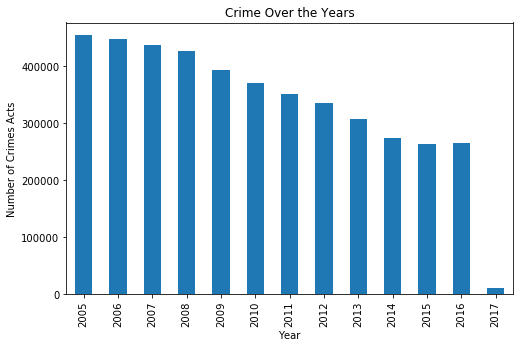

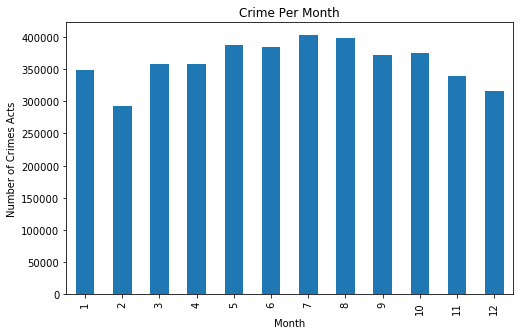

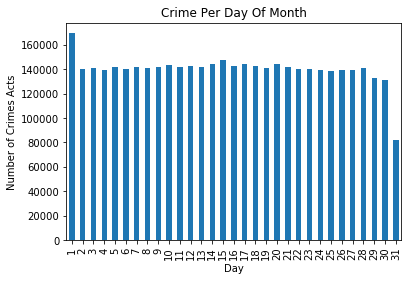

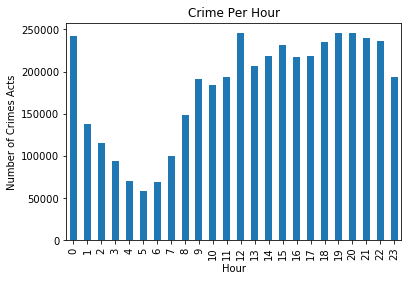

In [9]:
#make graph of crimes per year
plt.figure(figsize = (8,5))
Crime_Data.groupby([Crime_Data.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))
#make graph of crimes per month
Crime_Data.groupby([Crime_Data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per day
Crime_Data.groupby([Crime_Data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per hour
Crime_Data.groupby([Crime_Data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [10]:
Crime_Data_date = Crime_Data.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)

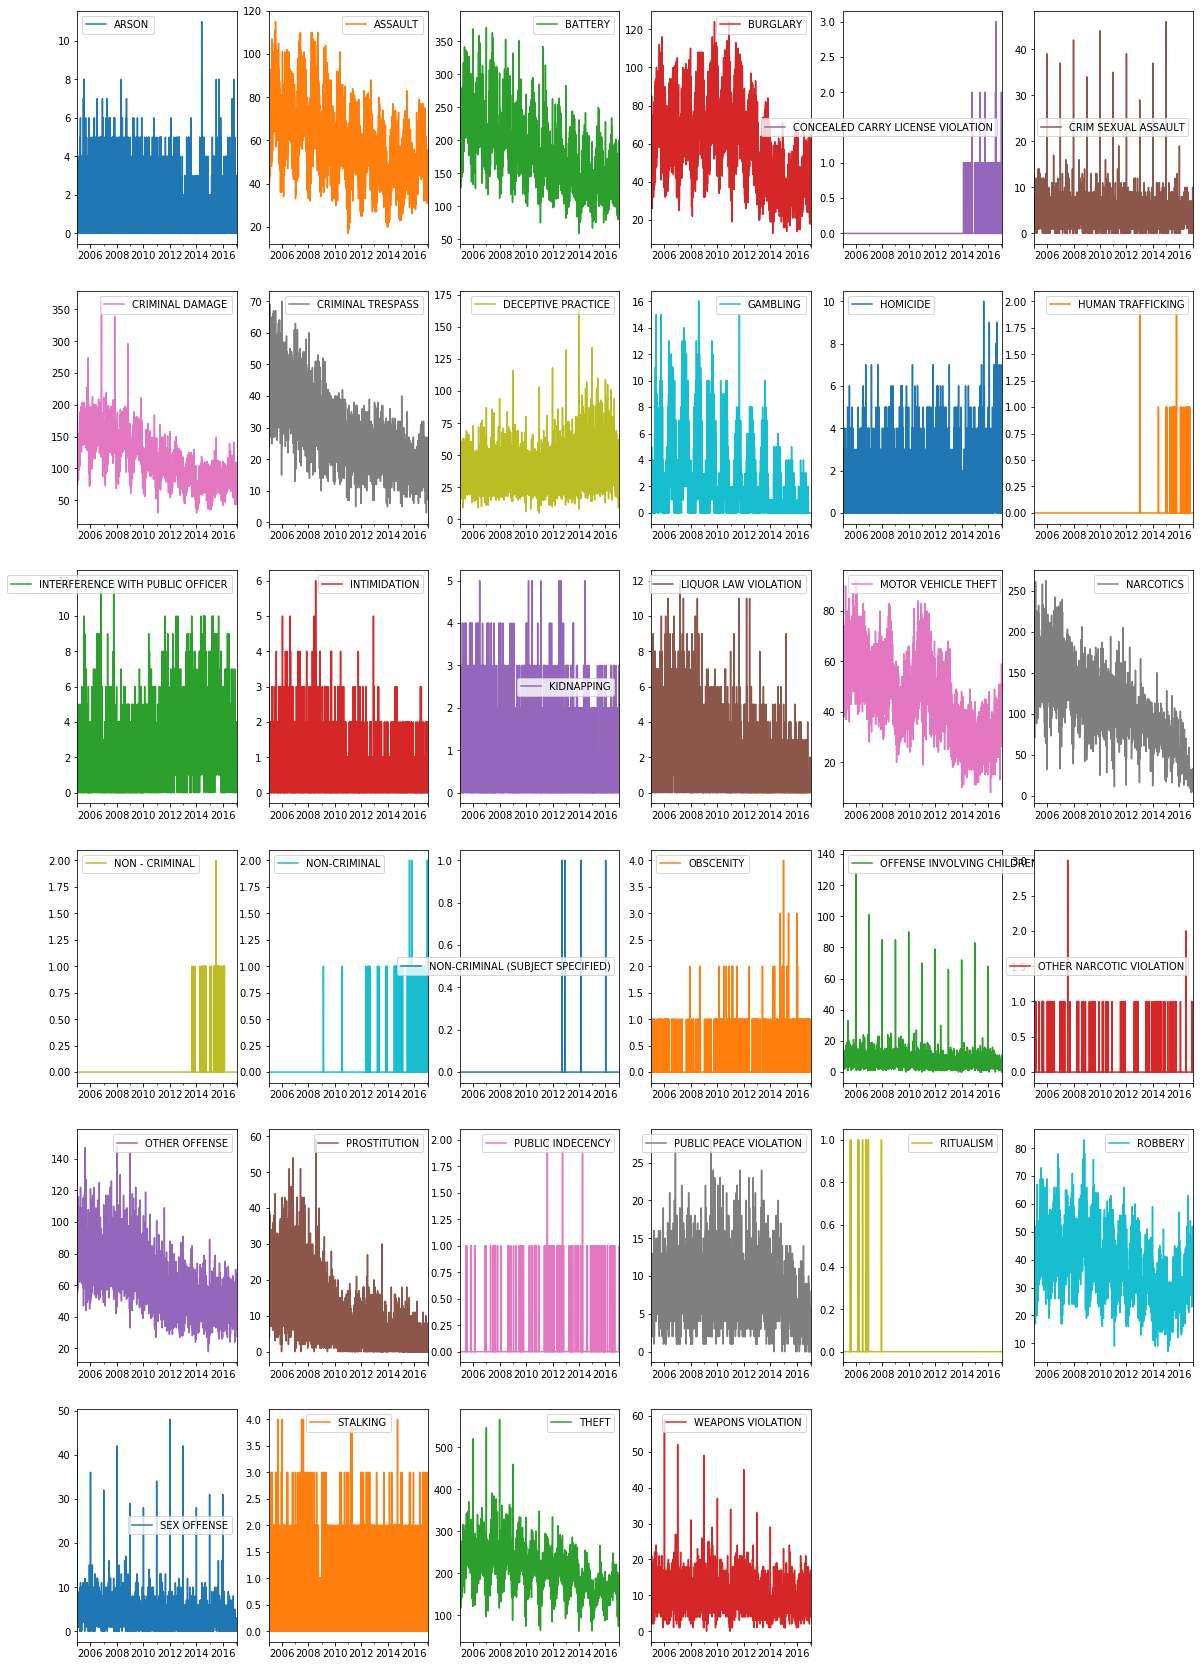

In [11]:
#make graph of different types of crimes per month
Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

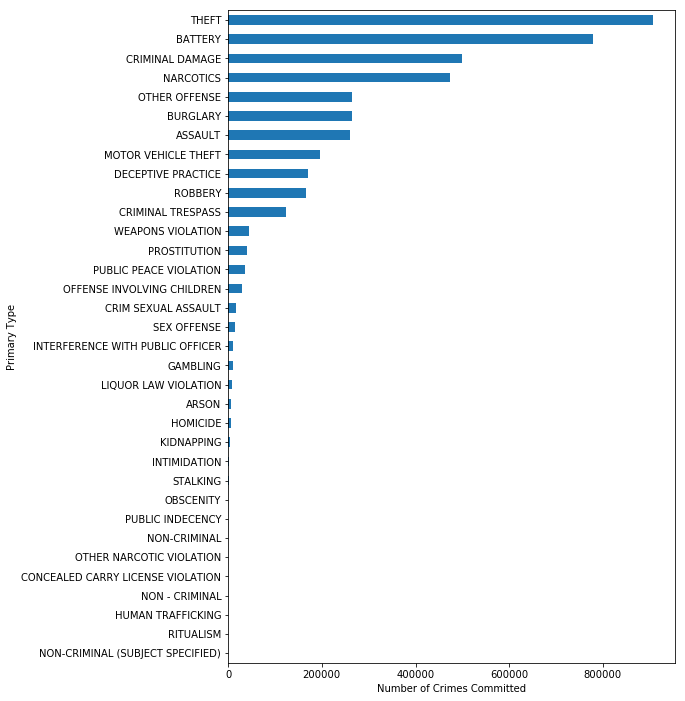

In [12]:
#plot of the relatives amounts of each type of crime
plt.figure(figsize = (8,12))
Crime_Data.groupby(Crime_Data['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()

In [13]:
#remove NAs from Longitude and Latitude data
Crime_Data = Crime_Data.dropna(axis = 0, how = 'any')

In [14]:
#extract year data for each crime, plot using matplotlib for each year the latitude and longitude variables
#make color by Description column
Groups = Crime_Data.groupby(Crime_Data['Primary Type'])
Groups = dict(list(Groups))
Keys = list(Groups.keys())

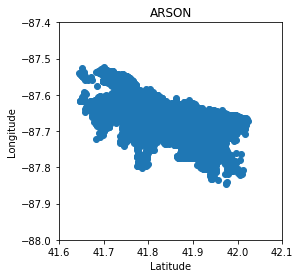

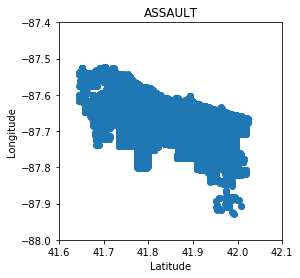

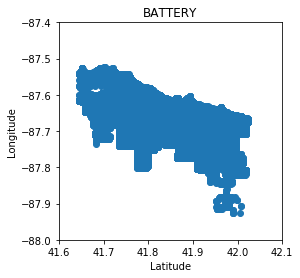

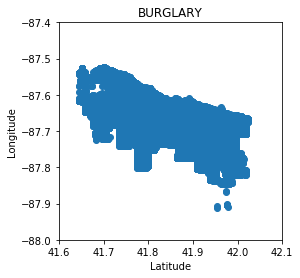

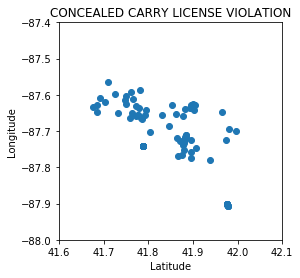

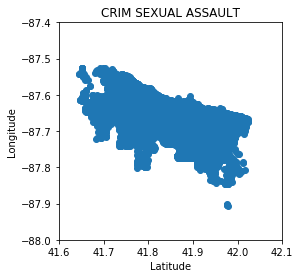

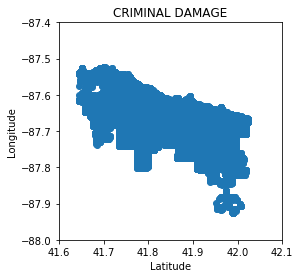

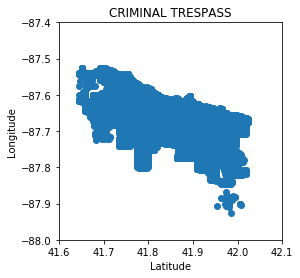

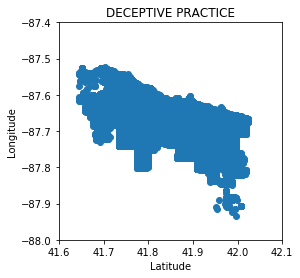

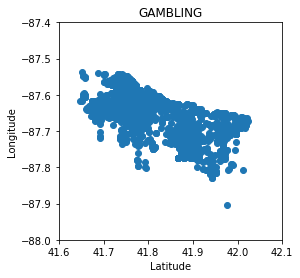

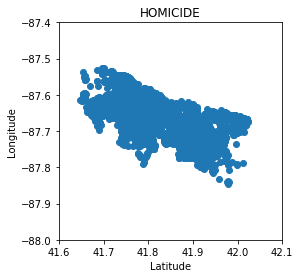

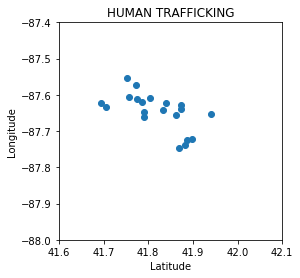

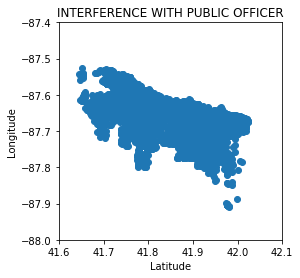

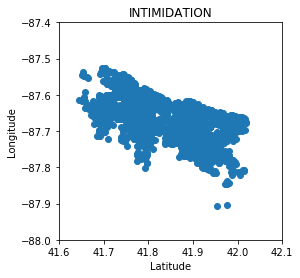

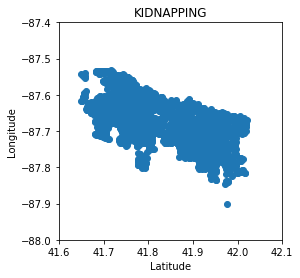

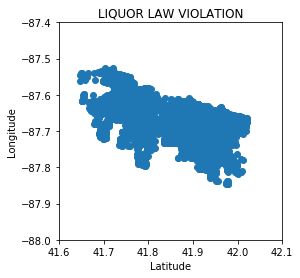

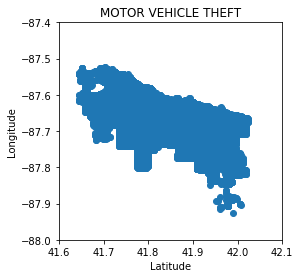

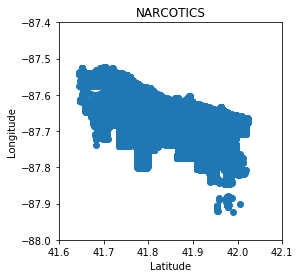

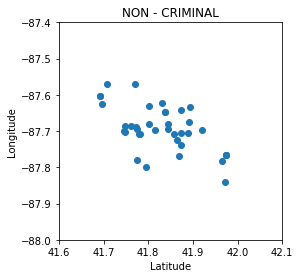

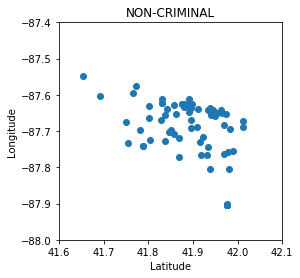

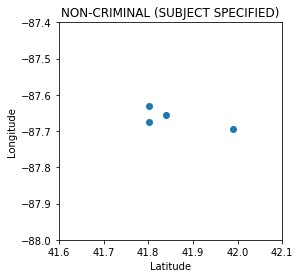

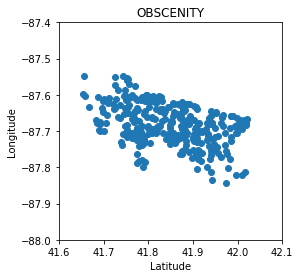

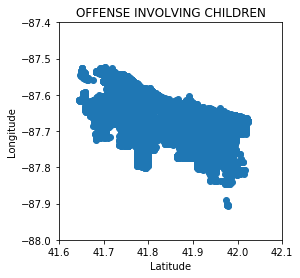

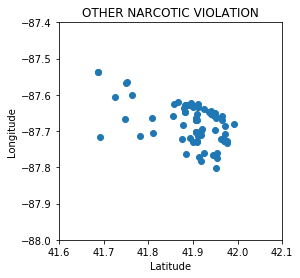

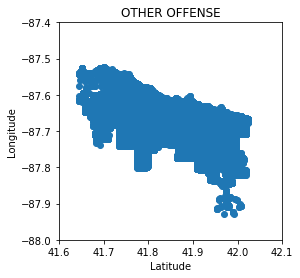

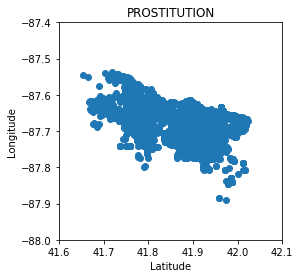

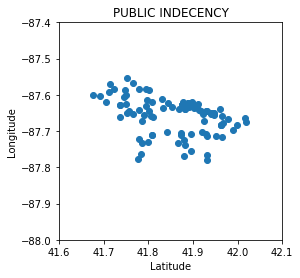

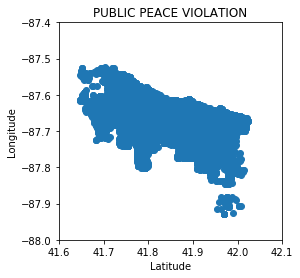

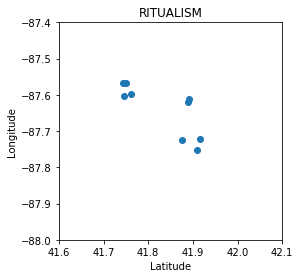

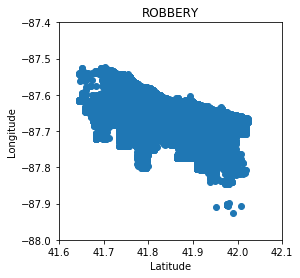

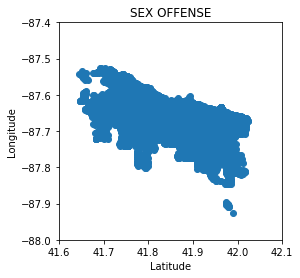

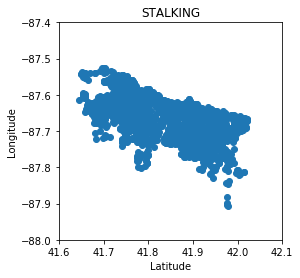

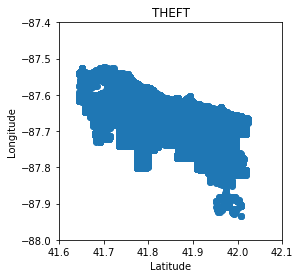

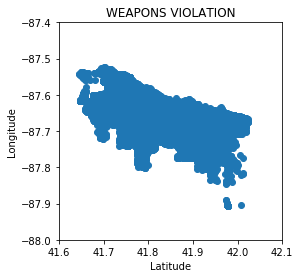

In [16]:
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.plot(Groups[key].Latitude, Groups[key].Longitude,'o')
    plt.xlim(41.6,42.1)
    plt.ylim(-88,-87.4)
    plt.title(key)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.show()

In [30]:
#Using text analysis, find most common streets of crime in Chicago
#Try to predict arrest based on data?
#predict domestic crime based on data?
#Using randomforest, find most important variable for arrest/domestic crimes